In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pymatreader as r
import matplotlib.pyplot as plt 

In [2]:
from regression import NIGLinearRegression, NormalInverseGamma

In [3]:
data = r.read_mat('Resources_data_problem7.mat')

x = data['x']
y = data['y']

X = np.concatenate([np.ones((len(x),1)), x.reshape((20,1)), (x**2).reshape((20,1)), (x**3).reshape((20,1)), (x**4).reshape((20,1)), (x**5).reshape((20,1))], axis = 1)

# results from part (a) :

1. the posterior distribution is given by :

 $$ p(w, \sigma^2 | y ) = NIG(a_n, b_n, V_n, \mu_n)$$
 
 
 $$a_n = a_o + \frac{n}{2}$$
 
 
 $$ V_n = (\gamma I  + \Phi^T \Phi)^{-1}$$
 
 
 $$\mu_n = (\gamma I + \Phi^T \Phi)^{-1} \Phi^T y $$
 
 
 $$b_n = n_o + \frac{1}{2} (y^Ty - \mu_n^T V_n^{-1} \mu_n)$$
 
2. the marginal posterior on the weights is given by : 

$$ p(w|y) = St_\nu( \mu_n, \Sigma_n)$$


$$\nu = 2 a_n$$


$$ \Sigma_n = \frac{b_n}{a_n} V_n$$


3. the predictive distribution is given by : 


$$ p(\tilde{y}|y, \tilde{\Phi}) = St_\nu( \tilde{\Phi}\mu_n, \frac{b_n}{a_n} (I + \tilde{\Phi} V_n \tilde{\Phi}^T)$$


 

the following set of plots for different models will only show the generating function (green) the predictive mean (red) and the noisy data given to us , we have also shown the standard error bars (plus/ minus twice of sigma) in black colour with dashed lines 

the second plot depicts various probable curves that can be chosen, if we randomly pick the weights from the marginal posterior , this is clearly showing the bayesian way of doing things 

# K = 1

In [4]:
a_0 = 0.1
b_0 = 0.00001

gamma = 20000

In [5]:
a_n_one = a_0 + (20/2)

V_n_one = np.linalg.inv((np.identity(2) * gamma) + (X[:, 0:2].T @  X[:, 0:2]))

mu_n_one = V_n_one @ (X[:,:2].T) @ y 

b_n_one = b_0 + ((y.T@y) - (mu_n_one.T @ np.linalg.inv(V_n_one) @ mu_n_one) )/2

In [6]:
V_n_one

array([[ 4.99519050e-05, -2.97717741e-07],
       [-2.97717741e-07,  4.77809928e-05]])

In [7]:
mu_n_one

array([0.01067733, 0.08619179])

In [8]:
b_n_one

2446.178966815029

In [9]:
a_n_one

10.1

In [10]:
model = NIGLinearRegression(np.zeros(2), gamma * np.eye(2), 0.1, 0.0001)

model.fit(X[:,:2], y)

In [11]:
sigma2 = model.get_marginal_sigma2()

weights = model.get_conditional_beta(sigma2.mean())

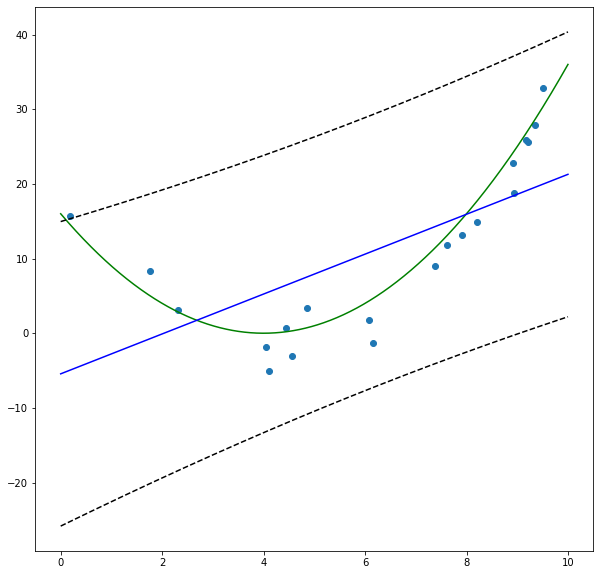

In [12]:
s = np.linspace(0, 10, 1000)

S = np.concatenate([np.ones((1000,1)), s.reshape((1000,1))], axis =1)

preds = model.predict(S)

plt.figure(figsize=(10, 10))

plt.scatter(x, y)

plt.plot(s, (s-4)**2, 'green')

t = weights.mean[0] + (weights.mean[1]*s) 

plt.plot(s, preds.mean(), 'b')

plt.plot(s, preds.mean() - 2 * preds.var() ** 0.5,linestyle="--", color="black")
plt.plot(s, preds.mean() + 2 * preds.var() ** 0.5,linestyle="--", color="black")

In [13]:
betas = weights.rvs(20)

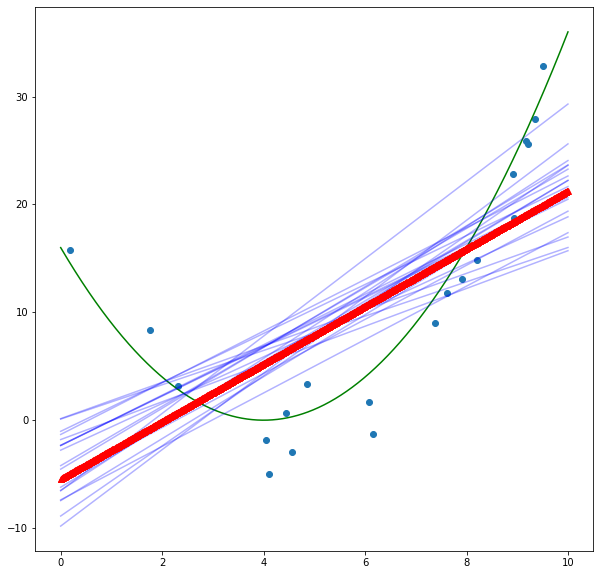

In [14]:
s = np.linspace(0, 10, 1000)

S = np.concatenate([np.ones((1000,1)), s.reshape((1000,1))], axis =1)

preds = model.predict(S)

plt.figure(figsize=(10, 10))

plt.scatter(x, y)

plt.plot(s, (s-4)**2, 'green')



for i in range(0,20):
    
    t = betas[i][0] + (betas[i][1]*s) 
    plt.plot(s, t, 'b', alpha=0.3)
    

plt.plot(s, preds.mean(), 'r^', )

# K = 2

In [15]:
a_n_two = a_0 + (20/2)

V_n_two = np.linalg.inv((np.identity(3) * gamma) + (X[:, :3].T @  X[:, :3]))

mu_n_two = V_n_two @ (X[:,:3].T) @ y 

b_n_two = b_0 + ((y.T@y) - (mu_n_two.T @ np.linalg.inv(V_n_two) @ mu_n_two) )/2

In [16]:
V_n_two

array([[ 4.99764395e-05, -1.00187797e-07, -5.54884466e-07],
       [-1.00187797e-07,  4.93713266e-05, -4.46743184e-06],
       [-5.54884466e-07, -4.46743184e-06,  1.25495329e-05]])

In [17]:
mu_n_two

array([0.00213509, 0.01741735, 0.19319539])

In [18]:
b_n_two

959.0934513166437

In [19]:
a_n_two

10.1

In [20]:
model = NIGLinearRegression(np.zeros(3), gamma * np.eye(3), 0.1, 0.00001)

model.fit(X[:,:3], y)

In [21]:
sigma2 = model.get_marginal_sigma2()

weights = model.get_conditional_beta(sigma2.mean())

In [22]:
weights.mean

array([19.43491948, -9.83890189,  1.14365083])

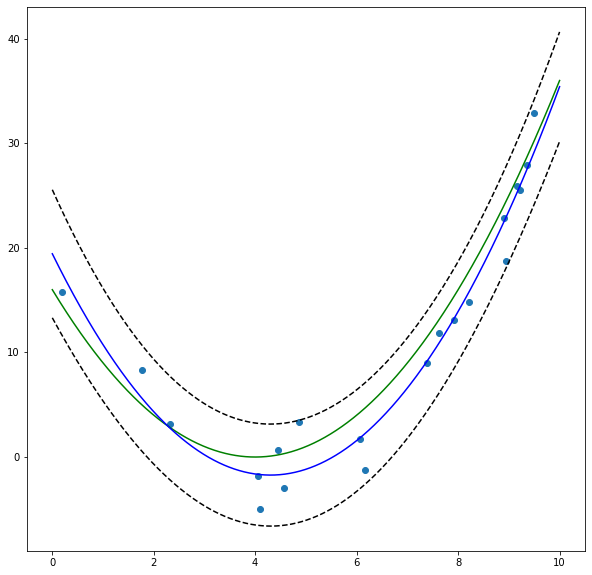

In [23]:
s = np.linspace(0, 10, 1000)

S = np.concatenate([np.ones((1000,1)), s.reshape((1000,1)), (s**2).reshape((1000,1)) ], axis =1)

preds = model.predict(S)

plt.figure(figsize=(10, 10))

plt.scatter(x, y)

plt.plot(s, (s-4)**2, 'green')

t = weights.mean[0] + (weights.mean[1]*s) 

plt.plot(s, preds.mean(), 'b')

plt.plot(s, preds.mean() - 2 * preds.var() ** 0.5,linestyle="--", color="black")
plt.plot(s, preds.mean() + 2 * preds.var() ** 0.5,linestyle="--", color="black")

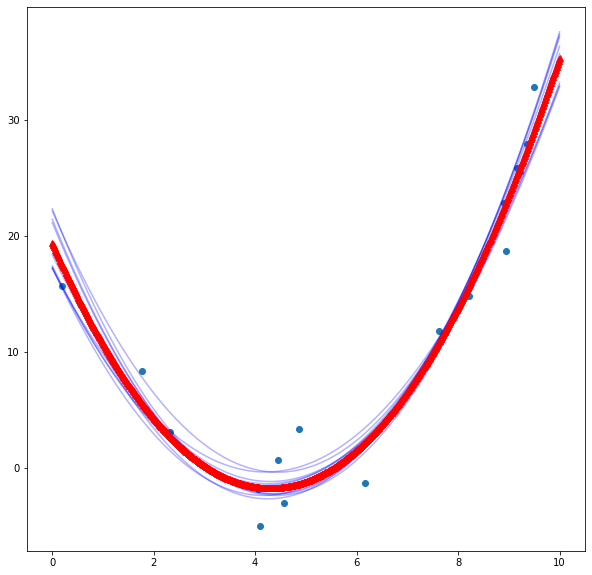

In [24]:
betas = weights.rvs(20)

s = np.linspace(0, 10, 1000)

S = np.concatenate([np.ones((1000,1)), s.reshape((1000,1)), (s**2).reshape((1000,1)) ], axis =1)

preds = model.predict(S)

plt.figure(figsize=(10, 10))

plt.scatter(x, y)


for i in range(1,12):
    
    t = betas[i][0] + (betas[i][1]*s) + (betas[i][2]*(s**2)) 
    plt.plot(s, t, 'b', alpha=0.3)
    

plt.plot(s, preds.mean(), 'r^')

# K = 3

In [25]:
a_n_thr = a_0 + (20/2)

V_n_thr = np.linalg.inv((np.identity(4) * gamma) + (X[:, :4].T @  X[:, :4]))

mu_n_thr = V_n_thr @ (X[:,:4].T) @ y 

b_n_thr = b_0 + ((y.T@y) - (mu_n_thr.T @ np.linalg.inv(V_n_thr) @ mu_n_thr) )/2

In [26]:
V_n_thr

array([[ 4.99804012e-05, -6.08858767e-08, -1.85866938e-07,
        -5.73024756e-08],
       [-6.08858767e-08,  4.97612257e-05, -8.06552993e-07,
        -5.68475493e-07],
       [-1.85866938e-07, -8.06552993e-07,  4.69226229e-05,
        -5.33758699e-06],
       [-5.73024756e-08, -5.68475493e-07, -5.33758699e-06,
         8.28841250e-07]])

In [27]:
mu_n_thr

array([-0.00012537, -0.00500787, -0.01736167,  0.03269612])

In [28]:
b_n_thr

314.19547016404135

In [29]:
a_n_thr

10.1

In [30]:
model = NIGLinearRegression(np.zeros(4), gamma * np.eye(4), 0.1, 0.00001)

model.fit(X[:,:4], y)

In [31]:
sigma2 = model.get_marginal_sigma2()

weights = model.get_conditional_beta(sigma2.mean())

In [32]:
weights.mean

array([17.52662905, -7.34279854,  0.51045225,  0.04230334])

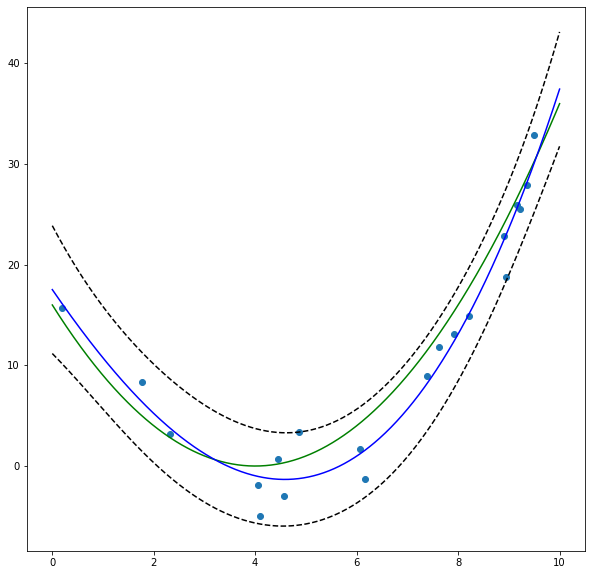

In [33]:
s = np.linspace(0, 10, 1000)

S = np.concatenate([np.ones((1000,1)), s.reshape((1000,1)), (s**2).reshape((1000,1)), (s**3).reshape((1000,1)) ], axis =1)

preds = model.predict(S)

plt.figure(figsize=(10, 10))

plt.scatter(x, y)

plt.plot(s, (s-4)**2, 'green')

t = weights.mean[0] + (weights.mean[1]*s) 

plt.plot(s, preds.mean(), 'b')

plt.plot(s, preds.mean() - 2 * preds.var() ** 0.5,linestyle="--", color="black")
plt.plot(s, preds.mean() + 2 * preds.var() ** 0.5,linestyle="--", color="black")

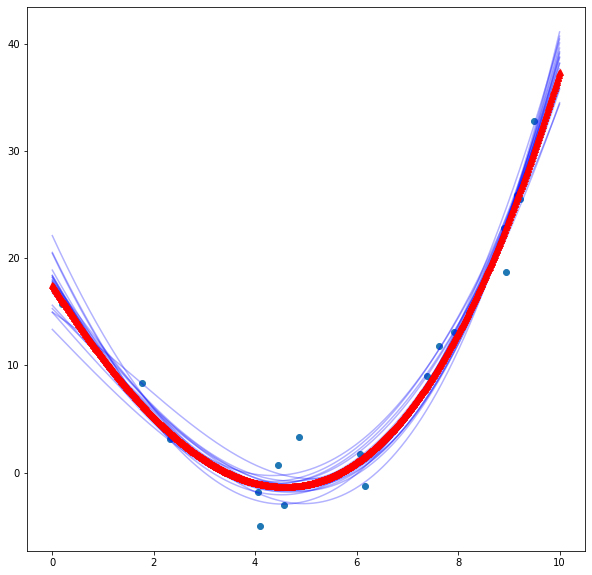

In [34]:
betas = weights.rvs(20)

s = np.linspace(0, 10, 1000)

S = np.concatenate([np.ones((1000,1)), s.reshape((1000,1)), (s**2).reshape((1000,1)), (s**3).reshape((1000,1)) ], axis =1)

preds = model.predict(S)

plt.figure(figsize=(10, 10))

plt.scatter(x, y)




for i in range(0,20):
    
    t = betas[i][0] + (betas[i][1]*s) + (betas[i][2]*(s**2)) + (betas[i][3]*(s**3)) 
    plt.plot(s, t, 'b', alpha=0.3)
    

plt.plot(s, preds.mean(), 'r^')

# K = 4

In [35]:
a_n_for = a_0 + (20/2)

V_n_for = np.linalg.inv((np.identity(5) * gamma) + (X[:, :5].T @  X[:, :5]))

mu_n_for = V_n_for @ (X[:,:5].T) @ y 

b_n_for = b_0 + ((y.T@y) - (mu_n_for.T @ np.linalg.inv(V_n_for) @ mu_n_for) )/2

In [36]:
V_n_for

array([[ 4.99855593e-05, -3.97142955e-08, -1.31005787e-07,
        -3.57053908e-07,  3.33133707e-08],
       [-3.97142955e-08,  4.98481235e-05, -5.81377651e-07,
        -1.79879294e-06,  1.36733363e-07],
       [-1.31005787e-07, -5.81377651e-07,  4.75061116e-05,
        -8.52566400e-06,  3.54312206e-07],
       [-3.57053908e-07, -1.79879294e-06, -8.52566400e-06,
         1.82479190e-05, -1.93589798e-06],
       [ 3.33133707e-08,  1.36733363e-07,  3.54312206e-07,
        -1.93589798e-06,  2.15149220e-07]])

In [37]:
mu_n_for

array([ 0.00086883, -0.0009272 , -0.00678758, -0.02507877,  0.00642091])

In [38]:
b_n_for

218.38277892818886

In [39]:
a_n_for

10.1

In [40]:
model = NIGLinearRegression(np.zeros(5), gamma * np.eye(5), 0.1, 0.00001)

model.fit(X[:,:5], y)

In [41]:
sigma2 = model.get_marginal_sigma2()

weights = model.get_conditional_beta(sigma2.mean())

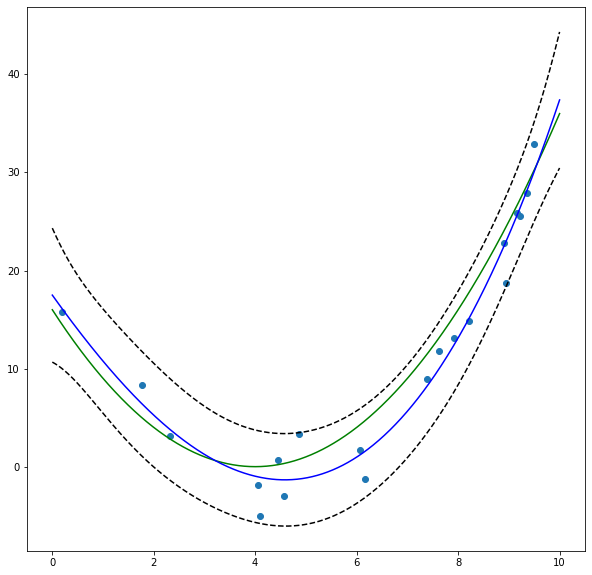

In [42]:
s = np.linspace(0, 10, 1000)

S = np.concatenate([np.ones((1000,1)), s.reshape((1000,1)), (s**2).reshape((1000,1)), (s**3).reshape((1000,1)), (s**4).reshape((1000,1)) ], axis =1)

preds = model.predict(S)

plt.figure(figsize=(10, 10))

plt.scatter(x, y)

plt.plot(s, (s-4)**2, 'green')

t = weights.mean[0] + (weights.mean[1]*s) 

plt.plot(s, preds.mean(), 'b')

plt.plot(s, preds.mean() - 2 * preds.var() ** 0.5,linestyle="--", color="black")
plt.plot(s, preds.mean() + 2 * preds.var() ** 0.5,linestyle="--", color="black")

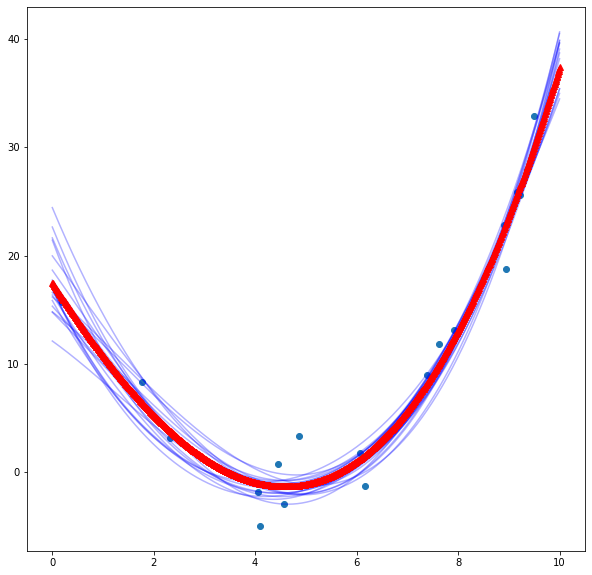

In [43]:
betas = weights.rvs(20)


s = np.linspace(0, 10, 1000)

S = np.concatenate([np.ones((1000,1)), s.reshape((1000,1)), (s**2).reshape((1000,1)), (s**3).reshape((1000,1)), (s**4).reshape((1000,1)) ], axis =1)

preds = model.predict(S)

plt.figure(figsize=(10, 10))

plt.scatter(x, y)


for i in range(0,20):
    
    t = betas[i][0] + (betas[i][1]*s) + (betas[i][2]*(s**2)) + (betas[i][3]*(s**3)) + (betas[i][4]*(s**4)) 
    plt.plot(s, t, 'b', alpha=0.3)
    

plt.plot(s, preds.mean(), 'r^')

# K = 5

In [44]:
a_n_fiv = a_0 + (20/2)

V_n_fiv = np.linalg.inv((np.identity(6) * gamma) + (X[:, :6].T @  X[:, :6]))

mu_n_fiv = V_n_fiv @ (X[:,:6].T) @ y 

b_n_fiv = b_0 + ((y.T@y) - (mu_n_fiv.T @ np.linalg.inv(V_n_fiv) @ mu_n_fiv) )/2

In [45]:
V_n_fiv

array([[ 4.99867672e-05, -3.20082526e-08, -8.84769409e-08,
        -1.83811503e-07, -2.77206412e-08,  4.57520839e-09],
       [-3.20082526e-08,  4.98972860e-05, -3.10055034e-07,
        -6.93552938e-07, -2.52647238e-07,  2.91886005e-08],
       [-8.84769409e-08, -3.10055034e-07,  4.90035128e-05,
        -2.42595975e-06, -1.79463869e-06,  1.61088840e-07],
       [-1.83811503e-07, -6.93552938e-07, -2.42595975e-06,
         4.30952289e-05, -1.06897075e-05,  6.56199740e-07],
       [-2.77206412e-08, -2.52647238e-07, -1.79463869e-06,
        -1.06897075e-05,  3.29915232e-06, -2.31181868e-07],
       [ 4.57520839e-09,  2.91886005e-08,  1.61088840e-07,
         6.56199740e-07, -2.31181868e-07,  1.73297672e-08]])

In [46]:
mu_n_fiv

array([ 1.00089640e-03, -8.46582245e-05, -2.13767732e-03, -6.13724919e-03,
       -2.52267718e-04,  5.00232014e-04])

In [47]:
b_n_fiv

211.1630608398216

In [48]:
a_n_fiv

10.1

In [49]:
model = NIGLinearRegression(np.zeros(6), gamma * np.eye(6), 0.1, 0.00001)

model.fit(X[:,:6], y)

In [50]:
sigma2 = model.get_marginal_sigma2().mean()

# weights = model.get_conditional_beta(sigma2) -- doesnt work 

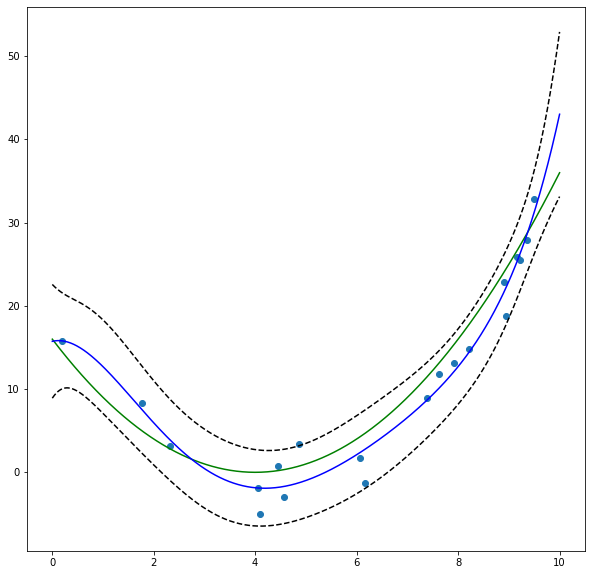

In [51]:
s = np.linspace(0, 10, 1000)

S = np.concatenate([np.ones((1000,1)), s.reshape((1000,1)), (s**2).reshape((1000,1)), (s**3).reshape((1000,1)), (s**4).reshape((1000,1)), (s**5).reshape((1000,1)) ], axis =1)

preds = model.predict(S)

plt.figure(figsize=(10, 10))

plt.scatter(x, y)

plt.plot(s, (s-4)**2, 'green')

plt.plot(s, preds.mean(), 'b')

plt.plot(s, preds.mean() - 2 * preds.var() ** 0.5,linestyle="--", color="black")
plt.plot(s, preds.mean() + 2 * preds.var() ** 0.5,linestyle="--", color="black")

In [52]:
model = NIGLinearRegression(mu_n_fiv, V_n_fiv, 0.1, 0.00001)

model.fit(X[:,:6], y)

In [53]:
sigma2 = model.get_marginal_sigma2().mean()
weights = model.get_conditional_beta(sigma2)

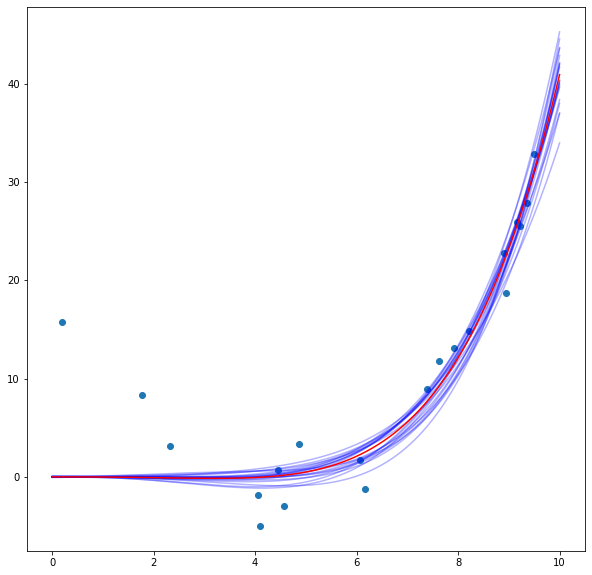

In [54]:
# sampling beta from posterior as otherwise the matrix becomes singular and the plot is created, asked Souvik sir for the permission 
betas = weights.rvs(20)


s = np.linspace(0, 10, 1000)

S = np.concatenate([np.ones((1000,1)), s.reshape((1000,1)), (s**2).reshape((1000,1)), (s**3).reshape((1000,1)), (s**4).reshape((1000,1)), (s**5).reshape((1000,1)) ], axis =1)

preds = model.predict(S)

plt.figure(figsize=(10, 10))


plt.scatter(x, y)


for i in range(0,20):
    
    t = betas[i][0] + (betas[i][1]*s) + (betas[i][2]*(s**2)) + (betas[i][3]*(s**3)) + (betas[i][4]*(s**4)) + (betas[i][5]*(s**5))
    
    plt.plot(s, t, 'b', alpha=0.3)
    

plt.plot(s, preds.mean(), 'r')

a cubic polynomial is the optimal model for the problem :) 